In [3]:
#%matplotlib widget
import serial,socket,os,glob
import matplotlib.pyplot as plt
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
import os,sys,socket
import tifffile as tif
import skimage as sk

'pc-i7'

In [3]:
class material:
    def __init__(self, name,th,rho,lstuart):
      g = 9.8
      self.name = name
      self.thickness = th*1e-6
      self.rho = rho
      self.lstuart = lstuart*1e-3
      self.B =  ((lstuart*1e-3*1.103)**3)*rho*th*1e-6*g # rigidez a la flexion por unidad de longitud
      self.I = (th*1e-6)**3/12  #momento de inercia por unidad de longitud
      self.E = self.B / self.I

In [161]:
escala = 10e-2/(1272-217)

Ym = escala * (1374-865)
t = 75
Poliesti_75 = material('Poliestireno',t,1.160e3,Ym*1e3)
B = Poliesti_75.B
rho = 1100

k1L = 1.875
k2L = 1.49418*np.pi
t = 75e-6
L = 50e-3*1.50
#L = 35e-3

mu = rho  * t
k1 = k1L/L
k2 = k2L / L
f_n1 = k1**2*(B/mu)**0.5/2/np.pi
f_n2 = k2**2*(B/mu)**0.5/2/np.pi

In [5]:
if socket.gethostname() =='pc-i7':
    dir_w = '/mnt/sdb4/juan/data_2024/photron/'    
else:
    dir_w = '/media/juan/JUAN_PMMH/LFD/photron/'

    

In [6]:
dirlist = np.sort(os.listdir(dir_w))

In [6]:
dir_i = dirlist[-10]

file_list = np.sort(glob.glob(dir_w+dir_i+'/*.tif'))
im_ref = tif.imread(file_list[0])

In [7]:
dir_i

'dshape_t075_L150_v40_20240731_163122'

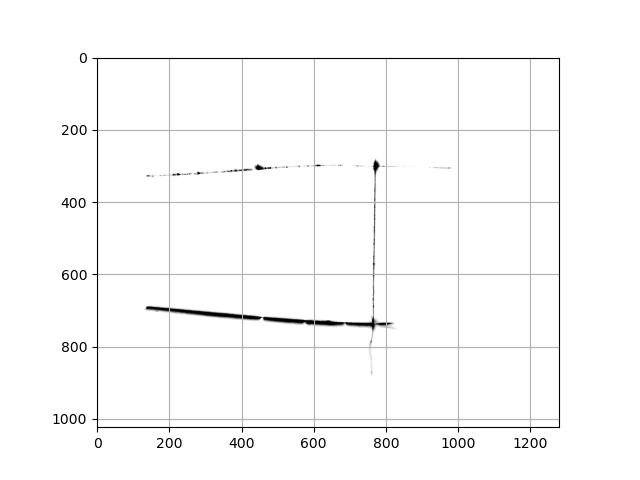

In [8]:
fig,ax = plt.subplots()
ax.imshow(im_ref,cmap='binary')
x1 = 138
y1 = 694
x2 = 138
y2 = 339
ax.grid()
plt.savefig('tikzs/def_075_L150_V40.pdf')

In [30]:
Nfiles = 2000
ncolumn = 20
vec_1, vec_2 = np.zeros((2,Nfiles,2*ncolumn))
for i, filei in enumerate(file_list[:Nfiles]):
    A = tif.imread(filei)
    vec_1[i] = A [y1-ncolumn:y1+ncolumn,x1]
    vec_2[i] = A [y2-ncolumn:y2+ncolumn,x2]

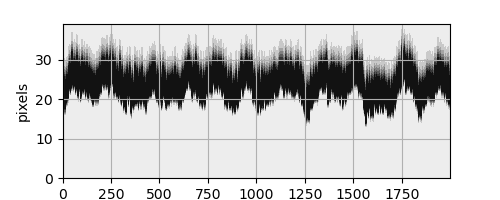

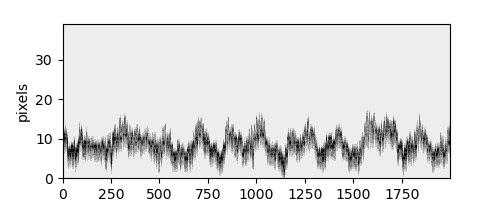

In [11]:
fig0,ax0 = plt.subplots(figsize=(5,2))
ax0.contourf(vec_1.T,cmap='binary')


ax0.set_xlabel('$N_{image}$')
ax0.set_ylabel('pixels')  
ax0.set_xlabel('$N_{image}$');
ax0.grid()

plt.savefig('tikzs/stack_t075_L150_V40_a.pdf')
fig1,ax1 = plt.subplots(figsize=(5,2))
ax1.contourf(vec_2.T,cmap='binary')
ax1.grid()
ax1.set_xlabel('$N_{image}$')
ax1.set_ylabel('pixels')  
ax1.set_xlabel('$N_{image}$');
ax1.grid()
plt.savefig('tikzs/stack_t075_L150_V40_b.pdf')

In [157]:
VEC_1 = np.fft.fft(vec_1-vec_1.mean(0),axis=0)
VEC_1b = np.fft.fft(img-img.mean(0),axis=0)
VEC_2 = np.fft.fft(vec_2-vec_2.mean(0),axis=0)
freqs = np.fft.fftfreq(len(vec_1),1/250)

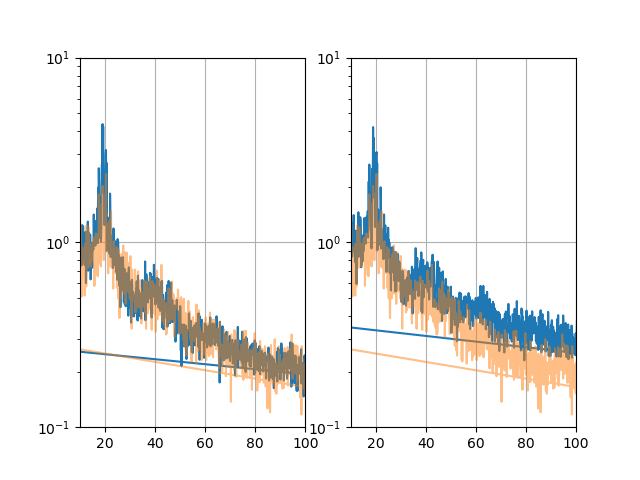

In [158]:
fig,ax = plt.subplots(1,2)
ax[0].semilogy(freqs,np.abs(VEC_1).sum(1)/np.abs(VEC_1).max(),alpha=1)
ax[0].semilogy(freqs,np.abs(VEC_2).sum(1)/np.abs(VEC_2).max(),alpha=0.5)
ax[0].set_xlim([10,100])
ax[0].set_ylim([1e-1,10])
ax[0].grid()

ax[1].semilogy(freqs,np.abs(VEC_1b).sum(1)/np.abs(VEC_1b).max(),alpha=1)
ax[1].semilogy(freqs,np.abs(VEC_2).sum(1)/np.abs(VEC_2).max(),alpha=0.5)
ax[1].set_xlim([10,100])
ax[1].set_ylim([1e-1,10])
ax[1].grid()

In [14]:
filei

'/media/juan/JUAN_PMMH/LFD/photron/dshape_t075_L150_v40_20240731_163122/dshape_t075_L150_v40_20240731_163122002000.tif'

In [15]:
dirlist[-4]

'dshape_t075_L150_v52_20240731_155347'

/tmp/ipykernel_87431/4057162908.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


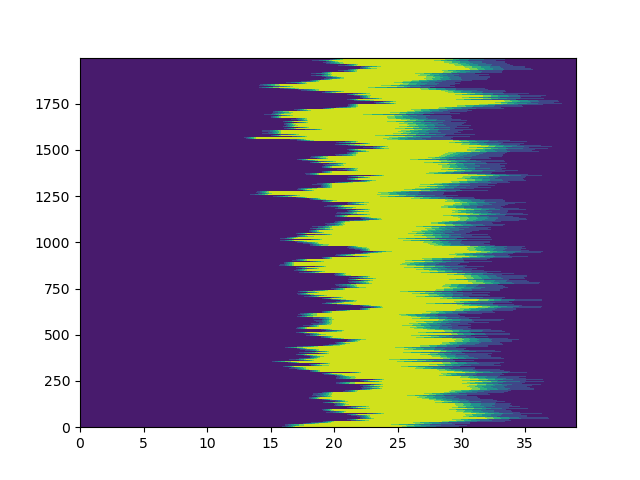

In [38]:
fig,ax = plt.subplots()
ax.contourf()

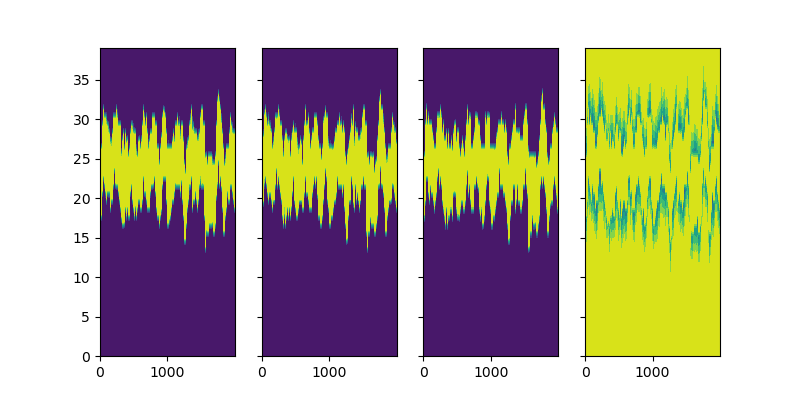

In [141]:
fig,ax = plt.subplots(1,4,sharey=True,figsize=(8,4),sharex=True)
ax0, ax1, ax2,ax3 =  ax
img0 = np.copy(vec_1);
img0[vec_1<3900] = 3900
img1 = sk.util.img_as_float64(img0/img0.max()*2-1);#sk.util.img_as_ubyte(vec_1)
img = sk.util.img_as_ubyte(img1)
img_rescale = sk.exposure.equalize_hist(img)
footprint = sk.morphology.disk(7)
img_eq = sk.filters.rank.equalize(img, footprint=footprint)
ax1.contourf(img.T)
ax2.contourf(img_rescale.T)
ax3.contourf(img_eq.T)
ax0.contourf(img0.T)

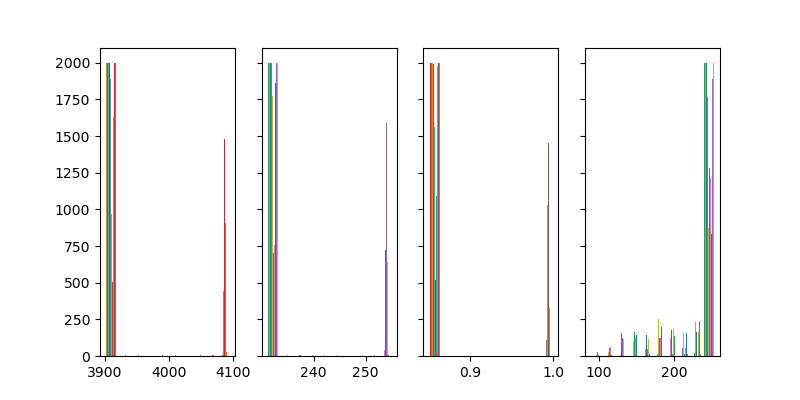

In [136]:
fig,ax = plt.subplots(1,4,figsize=(8,4),sharey=True)
A = np.histogram(img)
ax[1].hist(img);
ax[2].hist(img_rescale);
ax[3].hist(img_eq);
ax[0].hist(img0);

3900.0

In [ ]:
nu_poisson = 0.38
Ym = np.array([22,40,63])*1e-3
thickness = np.array([28,57,103])
pesos = np.array([0.48,0.73,2.56])*1e-3
areas = np.array([100*149,200*55,195*95])*1e-6
rho = pesos / (areas*thickness)
g = 9.8




mu = rho * t  *g

B = (Ym*1.103)**3*mu
Ih = t**3/(12*(1-nu_poisson**2))
E = (1.103*Ym)**3*rho*g/Ih
 


    

In [49]:
rho

array([8.45637584e-07, 8.55741627e-07, 9.86124759e-07])

In [41]:
rho = 1160

k1L = 1.875
t = 75e-6
L = 50e-3*1.50
#L = 35e-3

mu = rho  * t
k1 = k1L/L
f_n1 = k1**2*(B/mu)**0.5/2/np.pi

In [42]:
f_n1

array([0.0038071 , 0.00382977, 0.00411119])

In [28]:
Ih

4.108958625525946e-14

In [33]:
B/1e-5

array([0.1699204 , 0.17195068, 0.19814956])

In [36]:
thickness

7.5e-05